## 2do Parcial - Simulación Computacional 2021-I
Agosto 18 de 2020 - Máxima hora de entrega: 2:00 pm 

## 1. (1.6 punto)
Usando el ejemplo de [_Red de Colas.ipynb_](https://colab.research.google.com/drive/1XSceiJ_pRUvQriXhtuNj-AvI3aklmXUE?usp=sharing) visto en clase, haga las siguientes modificaciones para responder las respectivas preguntas.




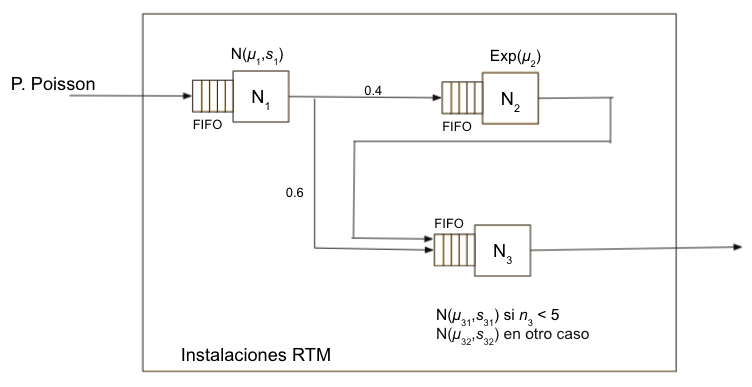


*   Establezca los siguientes parámetros:
$\lambda = 7.0$, $\mu_1 = 2.0$, $s_1 = 1.5$, $\mu_2 = 3.5$, $\mu_{31} = 5.0$, $s_{31} = 3.0$, $\mu_{32} = 3.5$, $s_{32} = 2.0$, y $T = 600$
*   La proporción clientes que pasan del nodo 1 al nodo 2 es del 30%.
*   Deje fijo el valor de la semilla `random.seed(18082021)`

Responda las siguientes preguntas:

a) ¿Cuál es el tiempo medio de los clientes en el sistema?

b) ¿Cuál es el número promedio de clientes para cada uno de los 3 nodos?

c) ¿Cuál es el tiempo transcurrido desde T hasta que el último cliente abandona el sistema?

d) ¿Cuál fue el número máximo de clientes en el sistema durante la simulación?

e) ¿Cuál fue el total de clientes que pasaron por cada uno de los 3 nodos?

f) ¿Cuál fue el total de clientes que pasaron por el sistema?

g) Haga un breve análisis de la simulación de acuerdo con los resultados, las respuestas de la preguntas anteriores y la evolución de las gráficas.


In [8]:
%matplotlib inline 

import numpy as np
import math
import random
import matplotlib.pyplot as plt

L = 7.0
mu1 = 2.0
sigma1 = 1.5
mu2 = 3.5
mu31 = 5.0
sigma31 = 3.0
mu32 = 3.5
sigma32 = 2.0

In [9]:
def Llegada_cliente(tsuc):
    global t, n_med_n1, n1, NLL1, LL1, TSuc, mu1, sigma1

    n_med_n1 = n_med_n1 + n1*(tsuc-t)
    n1 = n1 + 1

    LLt.append(tsuc)

    NLL1 = NLL1 + 1
    LL1.append(tsuc)
    t=tsuc

    Y = np.random.exponential(L) 
    if (t+Y) < T:
        TSuc['tLL1'] = t + Y
    if n1 == 1:
        Y = np.random.normal(mu1, sigma1)
        if Y < 0:
            Y = 0
        TSuc['tS1'] = t + Y

def Servicio_nodo1(tsuc):
    global t, n1, n2, n3, n_med_n1, n_med_n2, n_med_n3, NS1, S1, NLL2, NLL3, LL2, LL3, TSuc, mu31, sigma31, mu2
    n_med_n1 = n_med_n1 + n1*(tsuc - t)
    n1 = n1 - 1

    NS1 = NS1 + 1 
    S1.append(tsuc)
    U = np.random.uniform(0,1)
    if U <= 0.3:
        n_med_n2 = n_med_n2 + n2*(tsuc-t)
        n2 = n2 + 1 

        NLL2 = NLL2 + 1
        LL2.append(tsuc)
        if n2 == 1:
            Z = np.random.exponential(mu2) 
            TSuc['tS2'] = tsuc + Z
    else:
        n_med_n3 = n_med_n3 + n3*(tsuc - t)
        n3 = n3 + 1

        NLL3 = NLL3 + 1 
        LL3.append(tsuc)
        if n3 == 1:
            W = np.random.normal(mu31, sigma31)
            if W < 0:
                W = 0
            TSuc['tS3'] = tsuc + W
    t = tsuc
    if n1 > 0:
        S = np.random.normal(mu1, sigma1)
        if S < 0:
            S = 0
        TSuc['tS1'] = tsuc + S

def Servicio_nodo2(tsuc):
    global t, n2, n3, n_med_n2, n_med_n3, NS2, NLL3, LL3, S2, TSuc, mu31, sigma31, mu2
    n_med_n2 = n_med_n2 + n2*(tsuc - t)
    n2 = n2 - 1

    NS2 = NS2 + 1
    S2.append(tsuc)
    if n2 > 0:
        Y = np.random.exponential(mu2)
        TSuc['tS2'] = tsuc + Y
    n_med_n3 = n_med_n3 + n3*(tsuc - t)
    n3 = n3 + 1

    NLL3 = NLL3 + 1
    LL3.append(tsuc)
    if n3 == 1:
        W = np.random.normal(mu31, sigma31)
        if W < 0:
            W = 0
        TSuc['tS3'] = tsuc + W
    t = tsuc

def Servicio_nodo3(tsuc):
    global t, n3, n_med_n3, NS3, S3, TSuc, mu31, sigma31, mu32, sigma32
    n_med_n3 = n_med_n3 + n3*(tsuc - t)
    n3 = n3 - 1

    St.append(tsuc)

    NS3 = NS3 + 1
    S3.append(tsuc)
    if n3 > 0:
        if n3 < 5:
            R = np.random.normal(mu31, sigma31)
        else:
            R = np.random.normal(mu32, sigma32)
        if R < 0:
            R = 0
        TSuc['tS3'] = tsuc + R
    t = tsuc

In [10]:
M = 999999.0

random.seed(18082021)

at = []
LLt = []
St = []
an1 = []
an2 = []
an3 = []
an = []

T = 600.0

t = tsuc = Tp = 0

NLL1 = NLL2 = NLL3 = NS1 = NS2 = NS3 = n1 = n2 = n3 = 0

n_med_n1 = n_med_n2 = n_med_n3 = 0


TSuc = {"tLL1":M, "tS1":M, "tS2":M, "tS3":M}

LL1 = []
LL2 = []
LL3 = []

S1 = []
S2 = []
S3 = []

X = np.random.exponential(L)
if X > T:
    Tp = t_med_sistema = 0.0
    n_med_n1 = n_med_n2 = n_med_n3 = 0
    exit
else:
    Llegada_cliente(X)
    while (min([TSuc['tLL1'],TSuc['tS1'],TSuc['tS2'],TSuc['tS3']])!=M): #((TSuc['tLL1'] != M)|(TSuc['tS1']!=M)|(TSuc['tS2']!=M)|(TSuc['tS3']!=M)):
        if min([TSuc['tLL1'],TSuc['tS1'],TSuc['tS2'],TSuc['tS3']]) == TSuc['tLL1']:
            tsuc = TSuc['tLL1']
            TSuc['tLL1'] = M
            Llegada_cliente(tsuc) 
        if min([TSuc['tLL1'],TSuc['tS1'],TSuc['tS2'],TSuc['tS3']]) == TSuc['tS1']:
            tsuc = TSuc['tS1']
            TSuc['tS1'] = M
            Servicio_nodo1(tsuc) 
        if min([TSuc['tLL1'],TSuc['tS1'],TSuc['tS2'],TSuc['tS3']]) == TSuc['tS2']:
            tsuc = TSuc['tS2']
            TSuc['tS2'] = M
            Servicio_nodo2(tsuc) 
        if min([TSuc['tLL1'],TSuc['tS1'],TSuc['tS2'],TSuc['tS3']]) == TSuc['tS3']:
            tsuc = TSuc['tS3']
            TSuc['tS3'] = M
            Servicio_nodo3(tsuc)
        at.append(tsuc)
        an1.append(n1)
        an2.append(n2)
        an3.append(n3)
        an.append(n1+n2+n3)

    Tp = max(0,t-T)
    acumulo1 = acumulo2 = acumulo3 = 0.0
    
    ind = 0
    while ind < NLL1:
        acumulo1 = acumulo1 + S1[ind] - LL1[ind]
        ind = ind + 1
    ind = 0
    while ind < NLL2:
        acumulo2 = acumulo2 + S2[ind] - LL2[ind]
        ind = ind + 1
    ind = 0
    while ind < NLL3:
        acumulo3 = acumulo3 + S3[ind] - LL3[ind]
        ind = ind + 1

    t_med_sistema = (acumulo1/NLL1) + (0.3*acumulo2/NLL2) + (acumulo3/NLL3)

    n_med_n1 = n_med_n1 / t
    n_med_n2 = n_med_n2 / t
    n_med_n3 = n_med_n3 / t

    exit

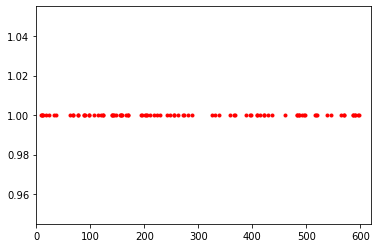

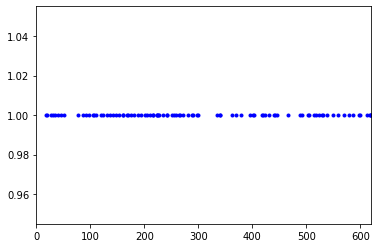

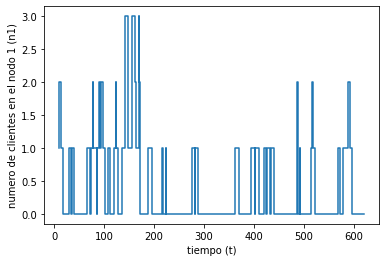

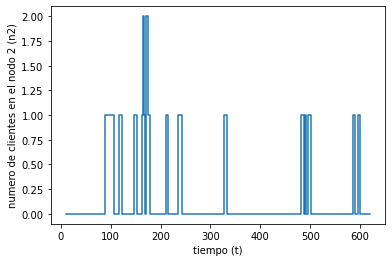

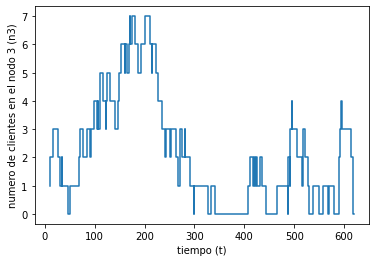

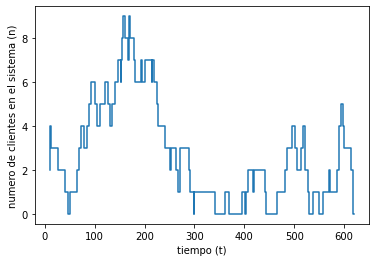

Tiempo medio de los clientes en el sistema (t_med_sistema):  20.064703123663545
Número promedio de clientes en el nodo 1 (n_med_n1):  0.38439124889174864
Número promedio de clientes en el nodo 2 (n_med_n2):  0.06082102439703621
Número promedio de clientes en el nodo 3 (n_med_n3):  1.5286028208086706
Tiempo transcurrido desde T hasta que el último cliente abandona el sistema:  20.071355991399855
Número máximo de clientes en el sistema:  9
Total de clientes que pasaron por el nodo 1 (n1):  91
Total de clientes que pasaron por el nodo 2 (n2):  25
Total de clientes que pasaron por el nodo 3 (n3):  91
Total de clientes que pasaron por el sistema:  91


In [11]:
at = np.array(at)
an1 = np.array(an1)
an2 = np.array(an2)
an3 = np.array(an3)
an = np.array(an)

LLt = np.array(LLt)
St = np.array(St)

tmp = np.zeros((len(LLt)))+1

plt.plot(LLt, tmp, 'r.')
plt.xlim(0, max(at))
plt.show()

tmp = np.zeros((len(St)))+1

plt.plot(St, tmp, 'b.')
plt.xlim(0, max(at))
plt.show()

plt.step(at,an1)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el nodo 1 (n1)')
plt.show()

plt.step(at,an2)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el nodo 2 (n2)')
plt.show()

plt.step(at,an3)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el nodo 3 (n3)')
plt.show()

plt.step(at,an)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el sistema (n)')
plt.show()

print("Tiempo medio de los clientes en el sistema (t_med_sistema): ",t_med_sistema)
#print("Tiempo medio de los clientes en la cola: ",t_med_cola)
print("Número promedio de clientes en el nodo 1 (n_med_n1): ",n_med_n1)
print("Número promedio de clientes en el nodo 2 (n_med_n2): ",n_med_n2)
print("Número promedio de clientes en el nodo 3 (n_med_n3): ",n_med_n3)
print("Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: ",Tp)
print("Número máximo de clientes en el sistema: ",max(an))
print("Total de clientes que pasaron por el nodo 1 (n1): ",NS1)
print("Total de clientes que pasaron por el nodo 2 (n2): ",NS2)
print("Total de clientes que pasaron por el nodo 3 (n3): ",NS3)
print("Total de clientes que pasaron por el sistema: ",NLL3)

**RTA g**. la primera grafica indica la llegada de los clientes al sistema, la segunda grafica indica la salida de los clientes del sistema, en la tercera, cuarta y quinta grafica nos permite observar la cantidad de clientes en los nodos en el paso de tiempo, en el caso del nodo tres se puede observar que la cantidad clientes es mayor a la de los otros dos nodos, esto se debe a que le llega el 70% de los clientes del nodo1 y el 100% de los clientes del nodo2.

## 2.  (1.7 punto)
Usando el ejemplo de SimPy de abajo de una conferencia que incluye buffet (refrigerio) con un tiempo máximo de simulación de 4 horas (i.e. 240 minutos) modifique el código para:

**a)** Implementar las medidas de desempeño de hambre promedio y conocimiento promedio.<br>
**b)** Comparar y analizar los siguientes escenarios a partir de las medidas de desempeño implementadas indicando cual escenario es mejor:

> 1. Duración de la charla 15 minutos, 4 charlas por sesión, 15 minutos de break, 2 puestos de buffet y 3 minutos por turno para comer en el buffet
> 2. Duración de la charla 20 minutos, 4 charlas por sesión, 10 minutos de break, 2 puestos de buffet y 3 minutos por turno para comer en el buffet
> 3. Duración de la charla 15 minutos, 4 charlas por sesión, 20 minutos de break, 1 puestos de buffet y 3 minutos por turno para comer en el buffet

**c)** Implemente una configuración que garantice que el conocimiento promedio adquirido por los asistentes sea mayor de 3 y el hambre promedio sea menor a 2.

In [35]:
!pip install simpy

In [36]:
from random import randint
import simpy 

In [123]:
TALKS_PER_SESSION = 1
TALK_LENGTH = 40
BREAK_LENGTH = 26
DURATION_EAT = 26
BUFFET_SLOTS = 5
PROM_HAMBRE = 0
AUX_HAMBRE = 0
PROM_CONOCIMIENTO = 0
AUX_CONOCIMIENTO = 0

In [95]:
def attendee(env, name, buffet, knowledge=0, hunger=0):
  global PROM_HAMBRE, AUX_HAMBRE, PROM_CONOCIMIENTO, AUX_CONOCIMIENTO
  while True:
    # Visit talks
    for i in range(TALKS_PER_SESSION):
      knowledge = knowledge + randint(0, 3) / (1 + hunger)
      PROM_CONOCIMIENTO += knowledge
      AUX_CONOCIMIENTO += 1
      hunger = hunger + randint(1, 4)
      PROM_HAMBRE += hunger
      AUX_HAMBRE +=1
      yield env.timeout(TALK_LENGTH)
    print('El asistente %s terminó las charlas con un conocimiento %.2f y hambre '
    '%.2f.' % (name, knowledge, hunger))

    # Go to buffet
    start = env.now
    with buffet.request() as req:
      yield req | env.timeout(BREAK_LENGTH - DURATION_EAT)
      time_left = BREAK_LENGTH - (env.now - start)
      
      if req.triggered:
        food = min(randint(3, 12), time_left) # Less time -> less food
        yield env.timeout(DURATION_EAT)
        hunger -= min(food, hunger)
        PROM_HAMBRE += hunger
        AUX_HAMBRE +=1
        time_left -= DURATION_EAT
        print('El asistente %s terminó de comer con hambre %.2f' %
              (name, hunger))
      else:
        hunger += 1 # Penalty for only taking a look at all the food.
        PROM_HAMBRE += hunger
        AUX_HAMBRE +=1
        print('El asistente %s no llegó al buffet :( , el hambre es ahora '
        'at %.2f.' % (name, hunger))
    yield env.timeout(time_left)

In [97]:
print('----------primer caso ------------')
env = simpy.Environment()
buffet = simpy.Resource(env, capacity=BUFFET_SLOTS)
for i in range(5):
  env.process(attendee(env, i, buffet))
env.run(until=240)
print(f"PROMEDIO HAMBRE: {PROM_HAMBRE/AUX_HAMBRE}")
print(f"CONOCIMIENTO PROMEDIO: {PROM_CONOCIMIENTO/AUX_CONOCIMIENTO}")

----------primer caso ------------
El asistente 0 terminó las charlas con un conocimiento 3.30 y hambre 11.00.
El asistente 1 terminó las charlas con un conocimiento 2.25 y hambre 9.00.
El asistente 2 terminó las charlas con un conocimiento 3.08 y hambre 10.00.
El asistente 3 terminó las charlas con un conocimiento 2.62 y hambre 10.00.
El asistente 4 terminó las charlas con un conocimiento 3.92 y hambre 13.00.
El asistente 0 terminó de comer con hambre 2.00
El asistente 1 terminó de comer con hambre 0.00
El asistente 2 terminó de comer con hambre 6.00
El asistente 3 terminó de comer con hambre 0.00
El asistente 4 terminó de comer con hambre 4.00
El asistente 0 terminó las charlas con un conocimiento 5.07 y hambre 9.00.
El asistente 1 terminó las charlas con un conocimiento 3.78 y hambre 10.00.
El asistente 2 terminó las charlas con un conocimiento 4.09 y hambre 18.00.
El asistente 3 terminó las charlas con un conocimiento 5.99 y hambre 12.00.
El asistente 4 terminó las charlas con un c

In [99]:
print('----------segundo caso ------------')
env = simpy.Environment()
buffet = simpy.Resource(env, capacity=BUFFET_SLOTS)
for i in range(5):
  env.process(attendee(env, i, buffet))
env.run(until=240)
print(f"PROMEDIO HAMBRE: {PROM_HAMBRE/AUX_HAMBRE}")
print(f"CONOCIMIENTO PROMEDIO: {PROM_CONOCIMIENTO/AUX_CONOCIMIENTO}")

----------segundo caso ------------
El asistente 0 terminó las charlas con un conocimiento 4.07 y hambre 11.00.
El asistente 1 terminó las charlas con un conocimiento 0.38 y hambre 16.00.
El asistente 2 terminó las charlas con un conocimiento 1.93 y hambre 5.00.
El asistente 3 terminó las charlas con un conocimiento 1.98 y hambre 9.00.
El asistente 4 terminó las charlas con un conocimiento 5.25 y hambre 7.00.
El asistente 0 terminó de comer con hambre 8.00
El asistente 1 terminó de comer con hambre 6.00
El asistente 2 terminó de comer con hambre 0.00
El asistente 3 terminó de comer con hambre 2.00
El asistente 4 terminó de comer con hambre 3.00
El asistente 0 terminó las charlas con un conocimiento 4.35 y hambre 18.00.
El asistente 1 terminó las charlas con un conocimiento 0.98 y hambre 15.00.
El asistente 2 terminó las charlas con un conocimiento 3.43 y hambre 9.00.
El asistente 3 terminó las charlas con un conocimiento 2.78 y hambre 11.00.
El asistente 4 terminó las charlas con un co

In [101]:
print('----------tercer caso caso ------------')
env = simpy.Environment()
buffet = simpy.Resource(env, capacity=BUFFET_SLOTS)
for i in range(5):
  env.process(attendee(env, i, buffet))
env.run(until=240)
print(f"PROMEDIO HAMBRE: {PROM_HAMBRE/AUX_HAMBRE}")
print(f"CONOCIMIENTO PROMEDIO: {PROM_CONOCIMIENTO/AUX_CONOCIMIENTO}")

----------tercer caso caso ------------
El asistente 0 terminó las charlas con un conocimiento 2.81 y hambre 13.00.
El asistente 1 terminó las charlas con un conocimiento 2.33 y hambre 12.00.
El asistente 2 terminó las charlas con un conocimiento 2.40 y hambre 11.00.
El asistente 3 terminó las charlas con un conocimiento 0.81 y hambre 7.00.
El asistente 4 terminó las charlas con un conocimiento 2.79 y hambre 9.00.
El asistente 0 terminó de comer con hambre 3.00
El asistente 1 terminó de comer con hambre 7.00
El asistente 2 terminó de comer con hambre 6.00
El asistente 3 terminó de comer con hambre 0.00
El asistente 4 terminó de comer con hambre 2.00
El asistente 0 terminó las charlas con un conocimiento 4.59 y hambre 10.00.
El asistente 1 terminó las charlas con un conocimiento 2.57 y hambre 17.00.
El asistente 2 terminó las charlas con un conocimiento 2.69 y hambre 21.00.
El asistente 3 terminó las charlas con un conocimiento 4.51 y hambre 13.00.
El asistente 4 terminó las charlas con

RTA B: el mejor escenario es el 2.

**escenario 1:**

PROMEDIO HAMBRE: 9.3625

CONOCIMIENTO PROMEDIO: 3.741121617328451

prom conocimiento - prom hambre = -5,6213

**escenario 2:**

PROMEDIO HAMBRE: 8.553846153846154

CONOCIMIENTO PROMEDIO: 3.08277873531826

prom conocimiento - prom hambre = -5,4711

**escenario 3:**

PROMEDIO HAMBRE: 9.373333333333333

CONOCIMIENTO PROMEDIO: 3.301135172303902

prom conocimiento - prom hambre = -6,0722


In [125]:
print('---------- PUNTO C ------------')
env = simpy.Environment()
buffet = simpy.Resource(env, capacity=BUFFET_SLOTS)
for i in range(5):
  env.process(attendee(env, i, buffet))
env.run(until=240)
print(f"PROMEDIO HAMBRE: {PROM_HAMBRE/AUX_HAMBRE}")
print(f"CONOCIMIENTO PROMEDIO: {PROM_CONOCIMIENTO/AUX_CONOCIMIENTO}")

---------- PUNTO C ------------
El asistente 0 terminó las charlas con un conocimiento 3.00 y hambre 1.00.
El asistente 1 terminó las charlas con un conocimiento 2.00 y hambre 3.00.
El asistente 2 terminó las charlas con un conocimiento 2.00 y hambre 2.00.
El asistente 3 terminó las charlas con un conocimiento 3.00 y hambre 1.00.
El asistente 4 terminó las charlas con un conocimiento 3.00 y hambre 1.00.
El asistente 0 terminó de comer con hambre 0.00
El asistente 1 terminó de comer con hambre 0.00
El asistente 2 terminó de comer con hambre 0.00
El asistente 3 terminó de comer con hambre 0.00
El asistente 4 terminó de comer con hambre 0.00
El asistente 0 terminó las charlas con un conocimiento 3.00 y hambre 4.00.
El asistente 1 terminó las charlas con un conocimiento 2.00 y hambre 2.00.
El asistente 2 terminó las charlas con un conocimiento 5.00 y hambre 4.00.
El asistente 3 terminó las charlas con un conocimiento 3.00 y hambre 1.00.
El asistente 4 terminó las charlas con un conocimient

## 3. (1.7 punto)
Abra el modelo del juego de la vida de Conway implementado en la versión Web de NetLogo en el siguiente enlace: http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Computer%20Science/Cellular%20Automata/Life.nlogo, y haga cada paso tomando la respectiva captura de pantalla completa del navegador:

a) Deshabilite el modo Interactivo (quitar candado) para editar el mundo dando click derecho sobre éste y modifíquelo para que la mínima coordenada para parches sea de -10 y la máxima de 10 tanto en eje X como en el eje Y con el parche de centro como origen (0,0) y tamaño de parche de 25.

b) Cree un procedimiento llamado _init-pattern_ que sea llamado al final del procedimiento _setup-blank_ que permita visualizar el siguiente patrón:

<center>

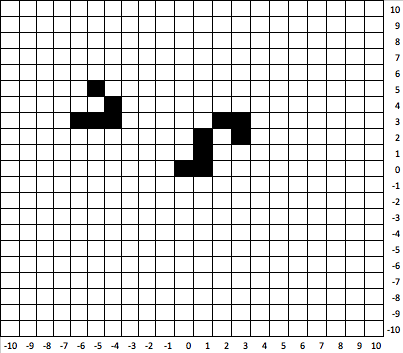
</center>

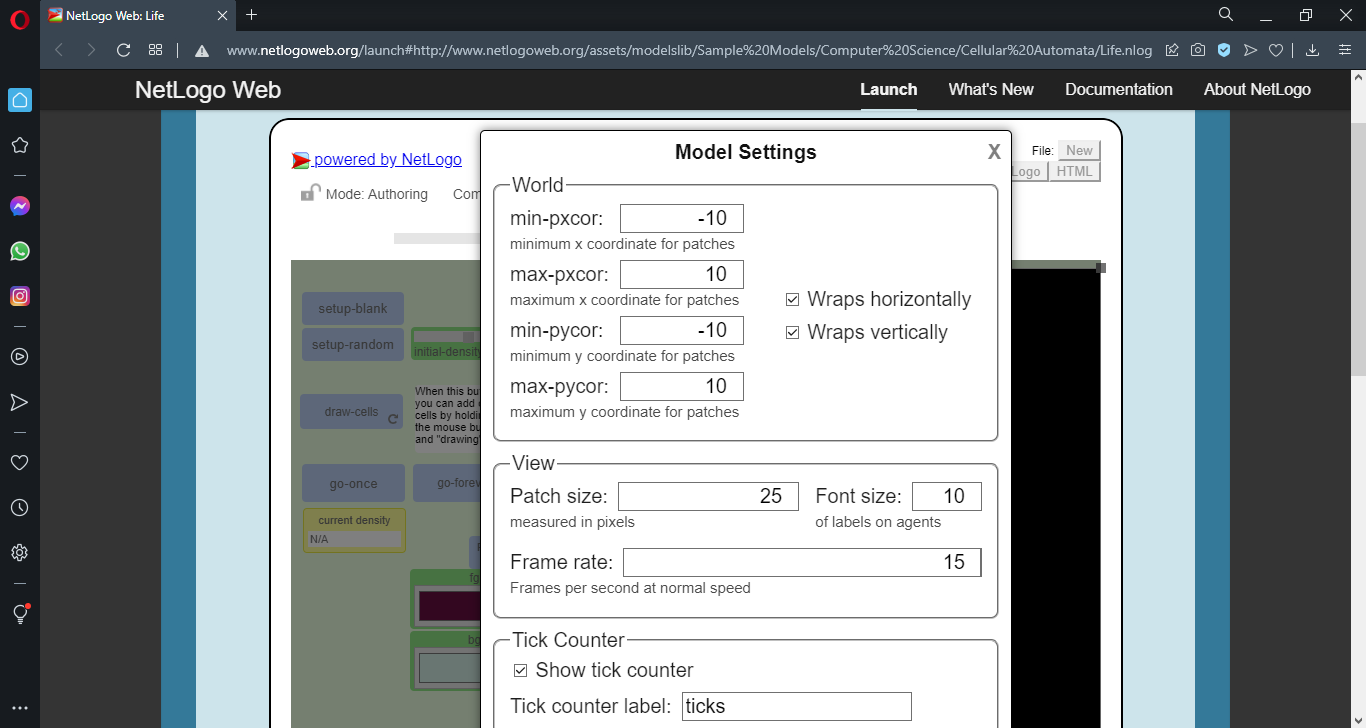

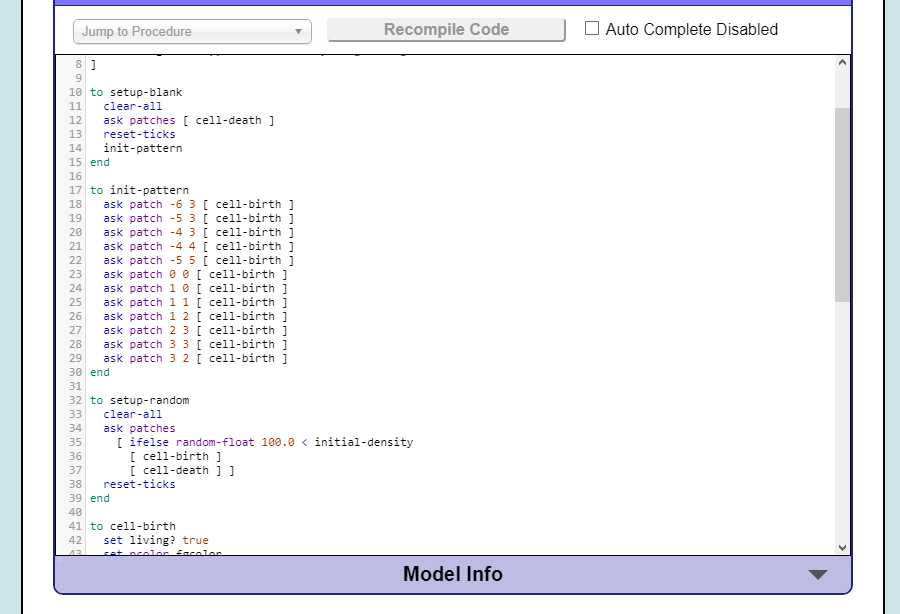

----------punto c ----------

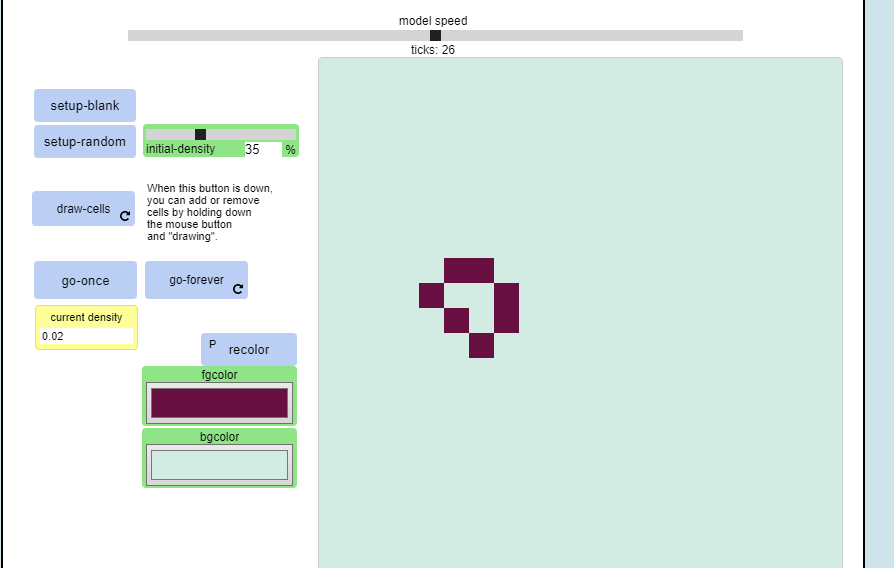

c) Ejecute el comando _go-forever_ y además de la captura de pantalla al final de la iteración 25, indique el respectivo nombre del patrón.

**RTA** : loaf

d)  Si al iniciar el patrón de acuerdo con la imagen del patrón de la izquierda es el _glider_, ¿Qué nombre se le podría dar al patrón estático de la derecha?

**RTA:** anzuelo

e) Exporte el modelo de NetLogo (esquina superior derecha) el cual descargará el archivo _Life.nlogo_, renombrelo con su código estudiantil (e.g. 160000514.nlogo) y envielo adjunto junto con este archivo de .ipynb